Script for generating Fig 3 (a) and (c), note that Fig 3 (b) is sort of a complex mix of a map made in python plus photoshop editting, more of an illustration than a figure:
- Fig. 3: Summary of the control and perturbed Antarctic runoff forcing schemes. (a) Runoff per ice shelf under the control (black), MW45 (blue), and MW85 (orange) scenarios. Ice shelves for which runoff is increased under the experimental forcing are highlighted in red and grouped into 6 regions (Dibble, Rennick, Amundsen and Bellingshausen, West Antarctic Peninsula, and Larsen) for which different scaling factors are used to amplify the control \citet{Depoorter2013} runoff pattern. (b) Map indicating ice shelf locations. Ice shelves contributing to meltwater perturbations are in red.  (c) Timeseries of effective runoff ($\text{Q}_\text{fw}^\text{(effective)}$, eq)  over the experimental period.  Ice shelf abbreviations: WES, West; SHA, Shackleton; TOT, Totten; MUS, Moscow; HOL;, Holmes; DIB, Dibble; MER, Mertz; COO, Cook; REN, Rennick; MAR, Mariner; DRY, Drybalski; RIS, Ross Ice Shelf; WIT, Withrow; SUL, Sulzberger; NIC,Nickerson; GET, Getz; DOT, Dotson; CRO, Crosson; THW, Thwaites; PIN, Pine Island; COS, Cosgrove; ABB, Abbott; VEN, Venable; STA, Stange; BAC, Bach; WIL, Wilkins; GEO, George VI; WOR, Wordie; LAR, Larsen; RON, Ronne; FIL, Filchner; BRU, Brunt; RII, Riiser; FIM, Fimbul; LAZ, Lazarev; BAU, Baudouin; PRI, Prince Harald; NE, North East ; AME, Amery.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('/home/156/rm2389/Honours_Thesis/python_functions/')
### import required python functions
from masking import shelf_mask_isobath
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import cosima_cookbook as cc
from matplotlib import gridspec
from matplotlib import rc, rcParams
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from dask.distributed import Client
client = Client('tcp://localhost:8786')
client

Client Scheduler: tcp://localhost:8786 Dashboard: http://localhost:8787/status,Cluster Workers: 6 Cores: 6 Memory: 18.00 GB


In [2]:
import matplotlib.cm as cm
cmap = cm.get_cmap('Oranges')
orange_color = cmap(0.75)

In [3]:
rc('text', usetex=True)
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
rc('xtick', labelsize=25) 
rc('ytick', labelsize=25) 
rc('axes', labelsize=25) 

In [4]:
filename = '/g/data/ua8/JRA55-do/RYF/v1-3/RYF.runoff_all.1984_1985.nc'
control_runoff = xr.open_dataset(filename)
control_runoff = control_runoff.friver
filename = '/g/data/v45/rm2389/runoff_perturbation_files/RYF.runoff_all.Golledge_rcp45_2100.nc'
rcp45_runoff = xr.open_dataset(filename)
rcp45_runoff = rcp45_runoff.friver
filename = '/g/data/v45/rm2389/runoff_perturbation_files/RYF.runoff_all.Golledge_rcp85_2100.nc'
rcp85_runoff = xr.open_dataset(filename)
rcp85_runoff = rcp85_runoff.friver

In [5]:
control_runoff = control_runoff.sel(latitude = slice(-90,-59)).isel(time = 0)
rcp45_runoff = rcp45_runoff.sel(latitude = slice(-90,-59)).isel(time = 0)
rcp85_runoff = rcp85_runoff.sel(latitude = slice(-90,-59)).isel(time = 0)
xt_ocean_runoff = np.append(control_runoff.longitude.values[0:320], (control_runoff.longitude.values[320:]-360))
control_runoff.coords['longitude'] = xt_ocean_runoff
rcp45_runoff.coords['longitude'] = xt_ocean_runoff
rcp85_runoff.coords['longitude'] = xt_ocean_runoff
control_runoff = control_runoff.rename({'latitude':'yt_ocean', 'longitude':'xt_ocean'})
rcp45_runoff = rcp45_runoff.rename({'latitude':'yt_ocean', 'longitude':'xt_ocean'})
rcp85_runoff = rcp85_runoff.rename({'latitude':'yt_ocean', 'longitude':'xt_ocean'})
control_runoff = xr.concat((control_runoff.isel(xt_ocean = slice(320,None)), control_runoff.isel(xt_ocean = slice(0,320))), dim = 'xt_ocean')
rcp45_runoff = xr.concat((rcp45_runoff.isel(xt_ocean = slice(320,None)), rcp45_runoff.isel(xt_ocean = slice(0,320))), dim = 'xt_ocean')
rcp85_runoff = xr.concat((rcp85_runoff.isel(xt_ocean = slice(320,None)), rcp85_runoff.isel(xt_ocean = slice(0,320))), dim = 'xt_ocean')

### Fig 3 (a) 

In [6]:
shelf_names = np.array(['WES', 'SHA', 'TOT', 'MUS', 'HOL','DIB','MER','COO','REN','MAR','DRY','RIS','WIT','SUL','NIC','GET','DOT','CRO','THW','PIN','COS','ABB','VEN','STA','BAC','WIL','GEO','WOR','LAR','RON','FIL','BRU','RII','FIM','LAZ','BAU','PRI','NE','AME'])
shelf_lons = np.array([-280,-270,-270,-247.5,-247.5,-237,-237,-234.5,-234.5,-227,-227,-220,-220,-209,-209,-202,-202,-185,-202,-185,-202,-185,-202,-158.5,-158.5,-156,-156,-152,-152,-149,-149,-114,-114,-111,-111,-108.5,-108.5,-104,-104,-88.6,-104,-88.6,-104,-88.6,-88.6,-83,-83,-75.5,-75.5,-70,-75.5,-70,-70,-62.5,-70,-62.5,-62.5,-55,-62.5,-46,-46,-28,-28,-24.5,-24.5,-12.5,-12.5,2.5,2.5,26,26,33,33,40.5,40.5,69,69,80])
shelf_lats = np.array([None,None, None,None, None,  None,None,None,  None,  None,None,None, None,None,None,None,-71,None,-73.5,-71,-76.5,-73.5,None,-76.5,None, None,None, None, None,None,None, None,None,None,None,None,None,None,None,-73.8,-73.8,-73,-73,None,None,None,None,None,None,-71.8,-71.8,None,None,-67.8,-67.8,None,-72,None,None,-72,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None])

In [7]:
xt_ocean_runoff = control_runoff.xt_ocean.values
yt_ocean_runoff = control_runoff.yt_ocean.values
lat_length = np.ones((124, 1440))*111/4*1e3 # make sure it's in m
lat_grid = np.pi/180*np.array([yt_ocean_runoff]*1440).transpose()
lon_length = lat_length * np.cos(lat_grid)
area_grid = lat_length*lon_length
area_grid = xr.DataArray(area_grid, coords = [yt_ocean_runoff, xt_ocean_runoff], dims = ['yt_ocean', 'xt_ocean'])

In [8]:
runoff = control_runoff * area_grid # convert kg.m2/s to kg/s
shelf_runoff_control_sv = np.zeros(39)
shelf_runoff_control_gt = np.zeros(39)
for i in range(39):
    lon1 = shelf_lons[2*i]
    lon2 = shelf_lons[2*i+1]
    lat1 = shelf_lats[2*i]
    lat2 = shelf_lats[2*i+1]
    ## Sv = kg/s * m^3/kg (1/rho0) * 10^-6
    shelf_sverdrups = (runoff.sel(yt_ocean = slice(lat1,lat2)).sel(xt_ocean = slice(lon1,lon2)).sum(dim = 'yt_ocean').sum(dim = 'xt_ocean')) * (1/1000) * 1e-6
    shelf_runoff_control_sv[i] = shelf_sverdrups.values
    shelf_gigatonnes = (runoff.sel(yt_ocean = slice(lat1,lat2)).sel(xt_ocean = slice(lon1,lon2)).sum(dim = 'yt_ocean').sum(dim = 'xt_ocean'))*(60*60*24*365)*1e-12
    shelf_runoff_control_gt[i] = shelf_gigatonnes.values

runoff = rcp45_runoff * area_grid # convert kg.m2/s to kg/s
shelf_runoff_rcp45_sv = np.zeros(39)
shelf_runoff_rcp45_gt = np.zeros(39)
for i in range(39):
    lon1 = shelf_lons[2*i]
    lon2 = shelf_lons[2*i+1]
    lat1 = shelf_lats[2*i]
    lat2 = shelf_lats[2*i+1]
    ## Sv = kg/s * m^3/kg (1/rho0) * 10^-6
    shelf_sverdrups = (runoff.sel(yt_ocean = slice(lat1,lat2)).sel(xt_ocean = slice(lon1,lon2)).sum(dim = 'yt_ocean').sum(dim = 'xt_ocean')) * (1/1000) * 1e-6
    shelf_runoff_rcp45_sv[i] = shelf_sverdrups.values
    shelf_gigatonnes = (runoff.sel(yt_ocean = slice(lat1,lat2)).sel(xt_ocean = slice(lon1,lon2)).sum(dim = 'yt_ocean').sum(dim = 'xt_ocean'))*(60*60*24*365)*1e-12
    shelf_runoff_rcp45_gt[i] = shelf_gigatonnes.values
    
runoff = rcp85_runoff * area_grid # convert kg.m2/s to kg/s
shelf_runoff_rcp85_sv = np.zeros(39)
shelf_runoff_rcp85_gt = np.zeros(39)
for i in range(39):
    lon1 = shelf_lons[2*i]
    lon2 = shelf_lons[2*i+1]
    lat1 = shelf_lats[2*i]
    lat2 = shelf_lats[2*i+1]
    ## Sv = kg/s * m^3/kg (1/rho0) * 10^-6
    shelf_sverdrups = (runoff.sel(yt_ocean = slice(lat1,lat2)).sel(xt_ocean = slice(lon1,lon2)).sum(dim = 'yt_ocean').sum(dim = 'xt_ocean')) * (1/1000) * 1e-6
    shelf_runoff_rcp85_sv[i] = shelf_sverdrups.values
    shelf_gigatonnes = (runoff.sel(yt_ocean = slice(lat1,lat2)).sel(xt_ocean = slice(lon1,lon2)).sum(dim = 'yt_ocean').sum(dim = 'xt_ocean'))*(60*60*24*365)*1e-12
    shelf_runoff_rcp85_gt[i] = shelf_gigatonnes.values

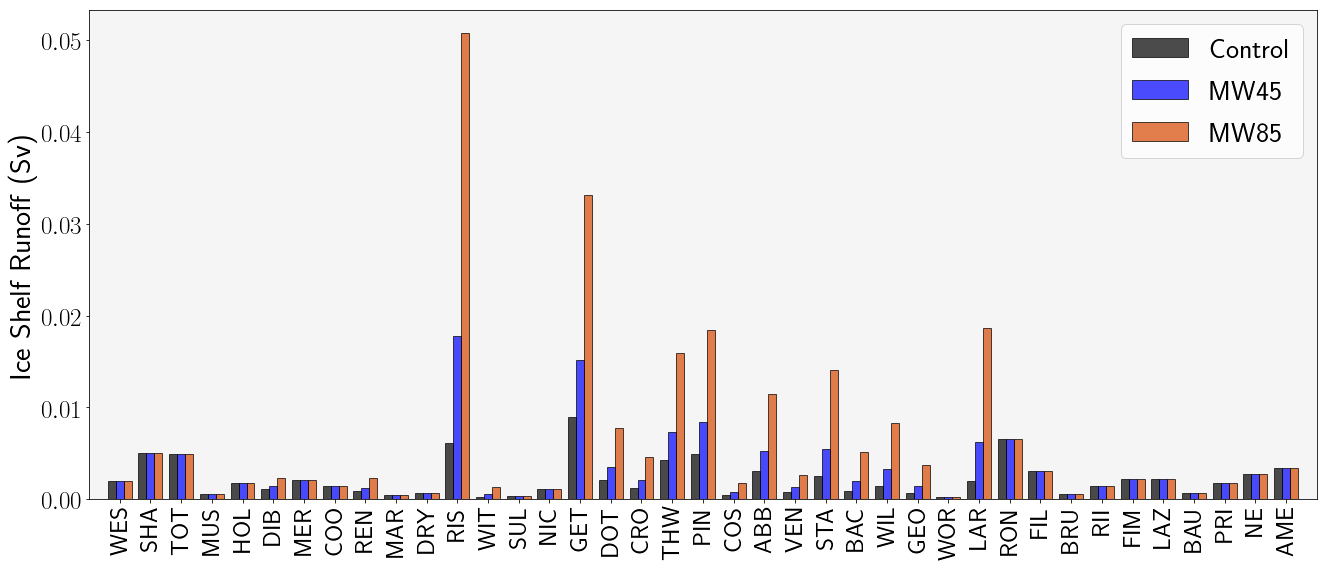

In [9]:
fig = plt.figure(1,figsize = (22,9))
ax = plt.subplot()

shelf_number = np.arange(39)
bar_width = 0.26
ax.bar(shelf_number-bar_width, shelf_runoff_control_sv, color = 'k' ,align = 'center', width = bar_width, edgecolor = 'k', linewidth = 1, alpha = 0.7, label = 'Control')
ax.bar(shelf_number, shelf_runoff_rcp45_sv, color = 'blue' ,align = 'center', width = bar_width, edgecolor = 'k', linewidth = 1, alpha = 0.7, label = 'MW45')
ax.bar(shelf_number + bar_width, shelf_runoff_rcp85_sv, color = orange_color ,align = 'center', edgecolor = 'k', linewidth = 1, alpha = 0.7, width = bar_width, label = 'MW85')
ax.set_ylabel('Ice Shelf Runoff (Sv)', fontsize = 30)
ax.set_xlim([-1,39])
ax.set_xticks(shelf_number)
ax.set_xticklabels(shelf_names, fontsize = 25, rotation = 'vertical')
ax.legend(loc = 1, fontsize = 28)
ax.set_facecolor('whitesmoke')

figurepath = 'Fig3a.png'
fig.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None)
plt.show()

### Fig 3 (c)

Ultimately, this isn't the **true** perturbation, the true perturbation is these values as mediated by the salt restoration. So below I'll make a nice plot of the total antarctic runoff minus the salt restoration on the continental shelf (since that's the most relevant to the mediation of the pertubation...though I will check this with maps).

I want to convert kg/s of salt into a negative kg/s of freshwater.
Previously in checks I simply divided the salt flux (kg/s) by the mean absolute salinity of seawater in the region in kg/kg. But I think it makes much more sense to divide by the sbaolute salinity of the surface cell 
that the salt is going into.

I wont redo that computations here but the basic procedure was:


- get `runoff`, `sfc_salt_flux_restore`, and `salt` (but only the shallowest cell)
- convert surface salt to absolute salinity (TEOS-10 functions)
- compute the freshwater equivalent of the surface salinity restoring (`fresh_from_salt_restore_control = -sfc_salt_flux_restore/surface_absolute_salt`)


In [10]:
db = '/g/data/v45/rm2389/databases/freshwater_experiments.db' # database path
session = cc.database.create_session(db)
control='01deg_jra55v13_ryf8485_spinup6'
rcp45='01deg_jra55v13_ryf8485_freshRCP45'
rcp85='01deg_jra55v13_ryf8485_freshRCP85'

In [11]:
dxt = cc.querying.getvar(control,'dxt',session,ncfile='ocean_grid.nc', n=1) 
dyt = cc.querying.getvar(control,'dyt',session,ncfile='ocean_grid.nc', n=1) 
dxt_shelf, shelf_map = shelf_mask_isobath(dxt)
dyt_shelf, shelf_map = shelf_mask_isobath(dyt)

In [12]:
shelf_fresh_from_salt_restore_control_extended = xr.open_dataset('/g/data/v45/rm2389/salt_restoration/salt_restoration_freshwater_equivalent_control_extended.nc', chunks = {'time':1, 'yt_ocean':510, 'xt_ocean':300})
shelf_fresh_from_salt_restore_rcp45 = xr.open_dataset('/g/data/v45/rm2389/salt_restoration/salt_restoration_freshwater_equivalent_rcp45.nc', chunks = {'time':1, 'yt_ocean':510, 'xt_ocean':300})
shelf_fresh_from_salt_restore_rcp85 = xr.open_dataset('/g/data/v45/rm2389/salt_restoration/salt_restoration_freshwater_equivalent_rcp85.nc', chunks = {'time':1, 'yt_ocean':510, 'xt_ocean':300})

In [13]:
shelf_fresh_from_salt_restore_control_extended = shelf_fresh_from_salt_restore_control_extended.salt_restore_fw_equivalent
shelf_fresh_from_salt_restore_rcp45 = shelf_fresh_from_salt_restore_rcp45.salt_restore_fw_equivalent
shelf_fresh_from_salt_restore_rcp85 = shelf_fresh_from_salt_restore_rcp85.salt_restore_fw_equivalent

In [14]:
fresh_from_salt_restore_control_extended = (shelf_fresh_from_salt_restore_control_extended * dyt_shelf * dxt_shelf).sum(dim = 'xt_ocean').sum(dim = 'yt_ocean')
fresh_from_salt_restore_rcp45 = (shelf_fresh_from_salt_restore_rcp45 * dyt_shelf * dxt_shelf).sum(dim = 'xt_ocean').sum(dim = 'yt_ocean')
fresh_from_salt_restore_rcp85 = (shelf_fresh_from_salt_restore_rcp85 * dyt_shelf * dxt_shelf).sum(dim = 'xt_ocean').sum(dim = 'yt_ocean')

In [15]:
fresh_from_salt_restore_control_ext = fresh_from_salt_restore_control_extended.load()
fresh_from_salt_restore_rcp45 = fresh_from_salt_restore_rcp45.load()
fresh_from_salt_restore_rcp85 = fresh_from_salt_restore_rcp85.load()

In [18]:
runoff_control = cc.querying.getvar(control, 'runoff', session, ncfile = 'ocean_month.nc', n = -63)
runoff_rcp45 = cc.querying.getvar(rcp45, 'runoff', session, ncfile = 'ocean_month.nc')
runoff_rcp85 = cc.querying.getvar(rcp85, 'runoff', session, ncfile = 'ocean_month.nc')
timeslice = slice('1937-06','1947-05')
latslice = slice(-90,-55)
runoff_control= runoff_control.sel(time = timeslice, yt_ocean=latslice)
runoff_rcp45 = runoff_rcp45.sel(time = timeslice, yt_ocean=latslice)
runoff_rcp85 = runoff_rcp85.sel(time = timeslice, yt_ocean=latslice)

In [19]:
total_runoff_control = (runoff_control * dyt_shelf * dxt_shelf).sum(dim ='xt_ocean').sum(dim ='yt_ocean').load()
total_runoff_rcp45 = (runoff_rcp45 * dyt_shelf * dxt_shelf).sum(dim ='xt_ocean').sum(dim ='yt_ocean').load()
total_runoff_rcp85 = (runoff_rcp85 * dyt_shelf * dxt_shelf).sum(dim ='xt_ocean').sum(dim ='yt_ocean').load()

In [32]:
total_runoff_control_ext = xr.concat((total_runoff_control[0:24], total_runoff_control), dim = 'time')
time_plot_ext = np.arange(-2+1/24,10,1/12)
total_runoff_control_ext.coords['time'] = time_plot_ext
fresh_from_salt_restore_control_ext.coords['time'] = time_plot_ext

In [35]:
control_net_coastal_freshwater = (total_runoff_control_ext + fresh_from_salt_restore_control_ext) * 1e-9
rcp45_net_coastal_freshwater = (total_runoff_rcp45.isel(time = slice(0,120)) + fresh_from_salt_restore_rcp45) * 1e-9
rcp85_net_coastal_freshwater = (total_runoff_rcp85 + fresh_from_salt_restore_rcp85) * 1e-9

In [39]:
rcp45_net_coastal_freshwater = xr.concat((control_net_coastal_freshwater[0:24], rcp45_net_coastal_freshwater), dim = 'time')
rcp45_net_coastal_freshwater['time'] = time_plot_ext
rcp85_net_coastal_freshwater = xr.concat((control_net_coastal_freshwater[0:24], rcp85_net_coastal_freshwater), dim = 'time')
rcp85_net_coastal_freshwater['time'] = time_plot_ext

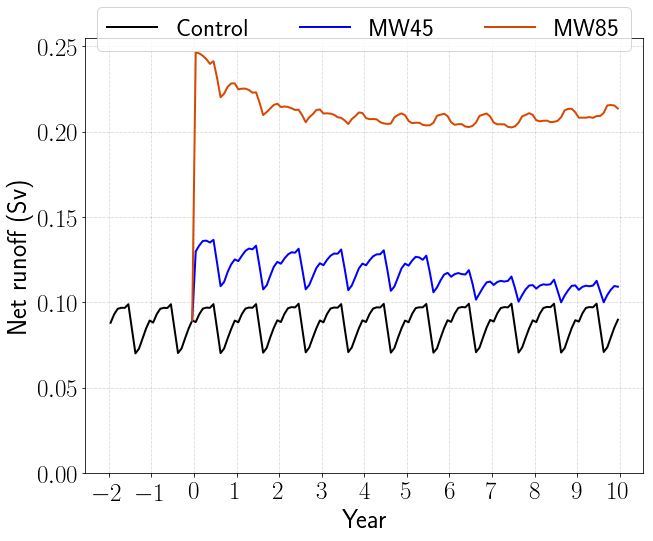

In [54]:
fig = plt.figure(1,figsize = (10,8))
ax0 = plt.subplot()
plt.subplots_adjust(hspace = 0)
ax0.plot(time_plot_ext, control_net_coastal_freshwater, color = 'k', linewidth =2, label = 'Control')
ax0.plot(time_plot_ext[23:], rcp45_net_coastal_freshwater[23:], color = 'blue', linewidth =2, label = 'MW45')
ax0.plot(time_plot_ext[23:], rcp85_net_coastal_freshwater[23:], color = orange_color, linewidth =2, label = 'MW85')
ax0.set_ylabel('Net runoff (Sv)', fontsize = 26)
ax0.set_xlabel('Year', fontsize = 26)
ax0.set_ylim([0,0.255])
ax0.set_xticks([-2,-1,0,1,2,3,4,5,6,7,8,9,10])
ax0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3, fontsize =25)
ax0.grid(color = 'k', linestyle = '--', alpha = 0.15)


figurepath = 'Fig3c.png'
fig.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None)

plt.show()